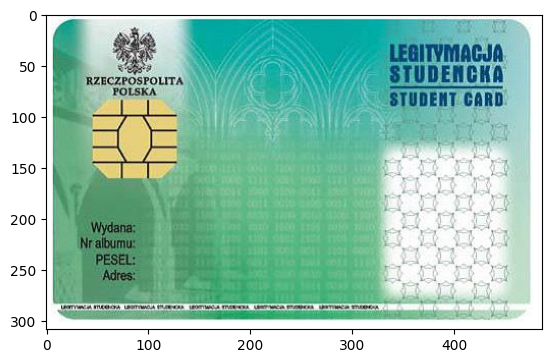

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

licence = cv2.imread('./wzor-els.png')

licence = cv2.cvtColor(licence, cv2.COLOR_BGR2RGB)

plt.imshow(licence)

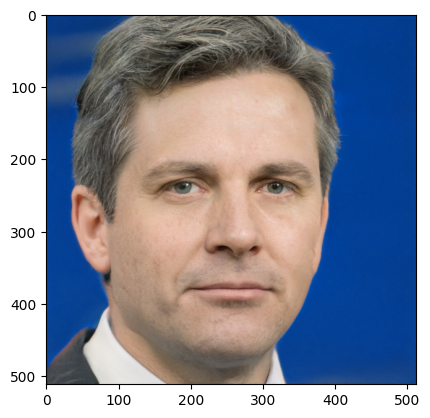

In [2]:
# load the face from ./faces/person01-1.png and place it on the image with the driving license

face = cv2.imread('./faces/person01-3.png')

face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

plt.imshow(face)


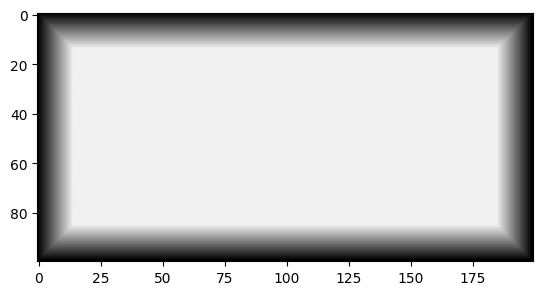

In [3]:
def create_mask(shape, *, offset=15, max=240):
    h, w = shape[:2]
    h = h - 2*offset
    w = w - 2*offset
    base_grad = np.linspace(0, max, offset) / 255

    corner = np.tile(base_grad, reps=(offset, 1))
    corner = np.min(np.dstack((corner, corner.T)), axis=2)

    left_edge = np.tile(base_grad, reps=(h, 1))
    top_edge = np.tile(base_grad, reps=(w, 1)).T

    top_edge = np.hstack((corner, top_edge, np.fliplr(corner)))

    mask = np.full((h, w), max / 255)
    mask = np.hstack((left_edge, mask, np.fliplr(left_edge)))
    mask = np.vstack((top_edge, mask, np.flipud(top_edge)))

    return np.dstack([mask]*3)


plt.imshow(create_mask((100, 200)), cmap="gray")
plt.show()

(168, 138)
(168, 138)


True

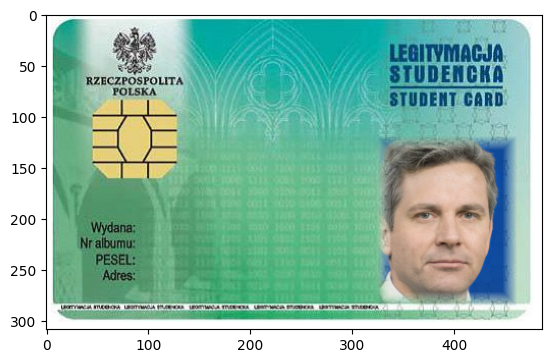

In [4]:
# Load the background image
background = cv2.imread('./wzor-els.png')

# Load the overlay image
overlay = cv2.imread('./faces/person01-3.png')

# crop overlay 10 percent from left and right
crop_percent = 9

overlay = overlay[:, int(overlay.shape[1] * crop_percent / 100):int(overlay.shape[1] * (1 - crop_percent / 100))]

# scale down the overlay image by 30 percent
scale_percent = 33

width = int(overlay.shape[1] * scale_percent / 100)
height = int(overlay.shape[0] * scale_percent / 100)

dim = (width, height)

overlay = cv2.resize(overlay, dim, interpolation=cv2.INTER_AREA)

# Coordinates where the overlay should be placed
x, y = 325, 119

h, w = overlay.shape[:2]
print(overlay.shape[:2])

# Define the region of interest (ROI) in the background image
roi = background[y:y+h, x:x+w]

print(roi.shape[:2])

# Overlay the image
# result = cv2.addWeighted(roi, 0, overlay, 1, 0)
mask = create_mask(overlay.shape)
result = overlay * mask + roi * (1-mask)

# Place the result back into the original image
background[y:y+h, x:x+w] = result

licence = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

plt.imshow(licence)

# save the image

cv2.imwrite('els.png', cv2.cvtColor(licence, cv2.COLOR_RGB2BGR))

True

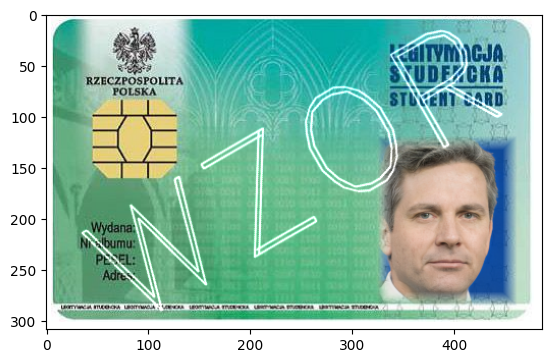

In [5]:
licence = cv2.imread('./els.png')

h, w = licence.shape[:2]
mask = np.zeros((h, w), dtype=np.uint8)
(tw, th), _ = cv2.getTextSize("WZOR", cv2.FONT_HERSHEY_DUPLEX, 5, 1)
cv2.putText(mask, "WZOR", ((w-tw)//2, (h+th)//2), cv2.FONT_HERSHEY_DUPLEX, 5, color=(255), lineType=cv2.LINE_AA, thickness=1)
M = cv2.getRotationMatrix2D((w/2, h/2), 30, 1)
mask = cv2.warpAffine(mask, M, (w, h))
text = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

plt.imshow(mask)
result = cv2.add(licence, text, mask=~mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

cv2.imwrite('els.png', result)

True

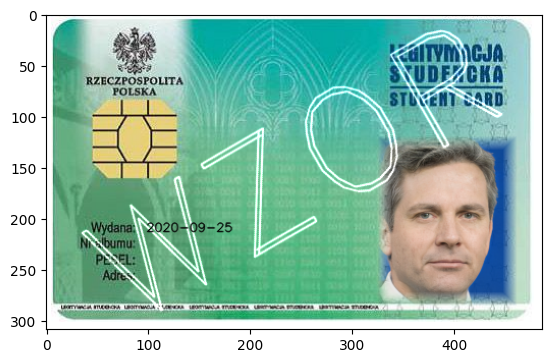

In [6]:
# write on els random issue date

licence = cv2.imread('./els.png')

licence = cv2.cvtColor(licence, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 98, 213

cv2.putText(licence, '2020-09-25', (x, y), font, 0.4, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(licence)

cv2.imwrite('els.png', cv2.cvtColor(licence, cv2.COLOR_RGB2BGR))

True

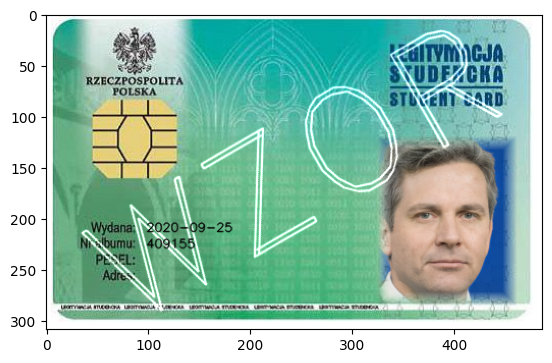

In [7]:
# write on licence random els id

licence = cv2.imread('./els.png')

licence = cv2.cvtColor(licence, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 98, 229

cv2.putText(licence, '409155', (x, y), font, 0.4, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(licence)

cv2.imwrite('els.png', cv2.cvtColor(licence, cv2.COLOR_RGB2BGR))


True

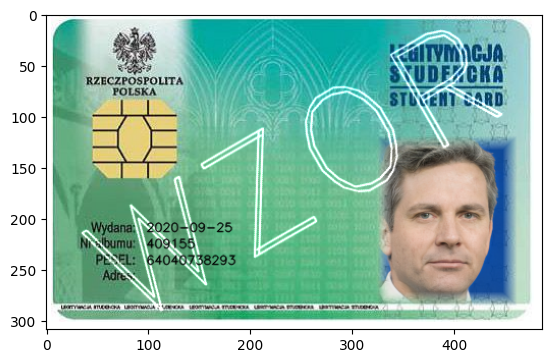

In [8]:
# write on licence random PESEL 

licence = cv2.imread('./els.png')

licence = cv2.cvtColor(licence, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 98, 245

cv2.putText(licence, '64040738293', (x, y), font, 0.4, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(licence)

cv2.imwrite('els.png', cv2.cvtColor(licence, cv2.COLOR_RGB2BGR))

True

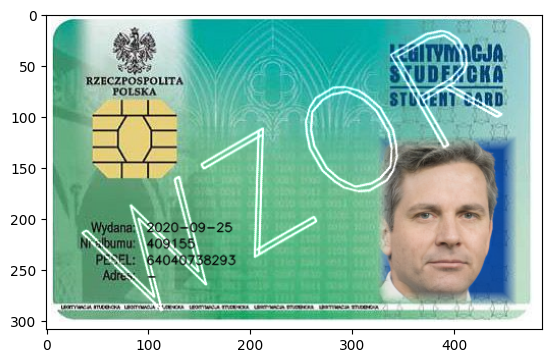

In [9]:
# write on els random address

licence = cv2.imread('./els.png')

licence = cv2.cvtColor(licence, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 98, 261

cv2.putText(licence, '-', (x, y), font, 0.4, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(licence)

cv2.imwrite('els.png', cv2.cvtColor(licence, cv2.COLOR_RGB2BGR))

True

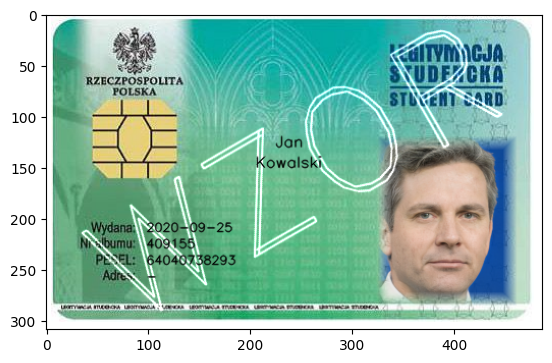

In [10]:
# write on licence random name

licence = cv2.imread('./els.png')

licence = cv2.cvtColor(licence, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

x, y = 225, 130

cv2.putText(licence, 'Jan', (x, y), font, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

x, y = 205, 150

cv2.putText(licence, 'Kowalski', (x, y), font, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(licence)

cv2.imwrite('els.png', cv2.cvtColor(licence, cv2.COLOR_RGB2BGR))

In [ ]:
 h, w = licence.shape[:2]
    text = "WZOR"
    font = cv2.FONT_HERSHEY_DUPLEX
    fontScale = 7
    thickness = 1

    mask = np.zeros((h, w), dtype=np.uint8)

    
    text_pos = ((w-text_w) // 2, (h+text_h) // 2)
    cv2.putText(mask, "WZOR", text_pos, font, fontScale,
                color=(255), lineType=cv2.LINE_AA, thickness=thickness)

    M = cv2.getRotationMatrix2D((w/2, h/2), 30, 1)
    mask = cv2.warpAffine(mask, M, (w, h))
    text = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    cv2.add(licence, text, mask=~mask, dst=licence)


True

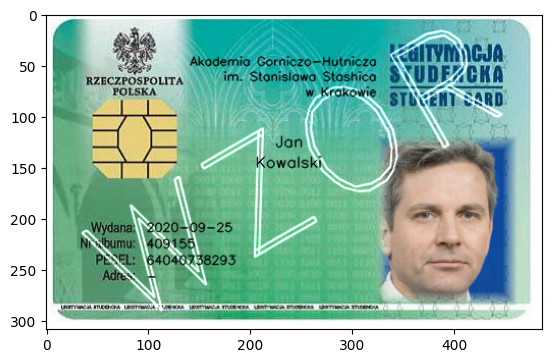

In [24]:
# write on licence random name

licence = cv2.imread('./els.png')
licence = cv2.cvtColor(licence, cv2.COLOR_BGR2RGB)


origin_x = 325
y = 35
y_step = 15

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.4
thickness= 1

y += y_step
text = 'Akademia Gorniczo-Hutnicza'
(text_w, text_h), _ = cv2.getTextSize(text, font, fontScale, thickness)
cv2.putText(licence, text, (origin_x - text_w, y), font, fontScale, (0, 0, 0), thickness, cv2.LINE_AA)

y += y_step
text = 'im. Stanislawa Stashica'
(text_w, text_h), _ = cv2.getTextSize(text, font, fontScale, thickness)
cv2.putText(licence, text, (origin_x - text_w, y), font, fontScale, (0, 0, 0), thickness, cv2.LINE_AA)

y += y_step
text = 'w Krakowie'
(text_w, text_h), _ = cv2.getTextSize(text, font, fontScale, thickness)
cv2.putText(licence, text, (origin_x - text_w, y), font, fontScale, (0, 0, 0), thickness, cv2.LINE_AA)

plt.imshow(licence)

cv2.imwrite('els.png', cv2.cvtColor(licence, cv2.COLOR_RGB2BGR))